In [176]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline
jtplot.style()

In [177]:
data = pd.read_csv('train1.csv')

In [178]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Столбцы c отсутствующими данными:

In [180]:
nullColList = data.isnull().max()
colNull = list(nullColList[nullColList == True].index)
colNull
data[colNull].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotFrontage     1201 non-null float64
Alley           91 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object
dtypes: float64(3), object(16)
memory usage: 216.8+ KB


Как видим в признаках есть нулевые данные:
 - для категориалных мы заполним значением _nan пустые значения. после onehotclosing это будет еще один столбец
 - для числовых данных 'LotFrontage', 'MasVnrArea', 'GarageYrBlt' будем в заивисмости от смысла использовать среднее, моду или медиану. второй вариан заменим на значение -999, чтобы алгоритм мог отличать такие данные

In [181]:
#признаки с нулевыми данными и числовым типом
feat_num_null = [col for col in colNull if data[col].dtype != 'O']
#признаки с нулевыми данными и не числовым типом
feat_cat_null = [col for col in colNull if data[col].dtype == 'O']

In [182]:
feat_num_null

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Исследуюем более детално числовые признаки:

In [183]:
'LotFrontage'
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

Список уникальных значений для GarageYrBlt и 81 значение пустое. Это годы постройки гаража - не думаю, что этот признак значаимый. Призак по сути категориальный. Все NA значения заменим на -999, чтобы алгоритм дерева мог отличать такого рода значения.

In [184]:
data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [185]:
#мода
data['GarageYrBlt'].value_counts().head(1).index[0]
#d_train[num_feat].fillna(-999)

2005.0

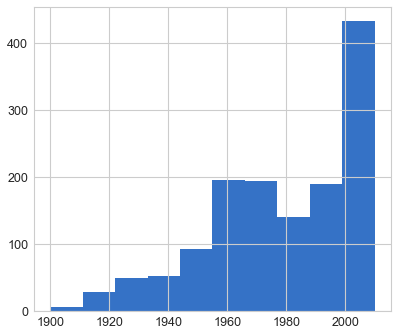

In [186]:
data['GarageYrBlt'].hist()

Список уникальных значений для MasVnrArea достаточно широк и 8 значений пустых. Судя по экпоненциальному распредению пустые значения лучше заменить на медиану, нежели рассматривать среднее значение (актуально было бы для нормального).
вторым вариантом: Все NA значения заменим на -999, чтобы алгоритм дерева мог отличать такого рода значения.

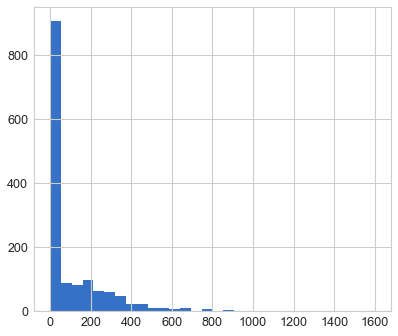

In [187]:
data['MasVnrArea'].hist(bins=30)

In [188]:
data['MasVnrArea'].median()

0.0

Список уникальных значений для LotFrontage достаточно широк и 259 значений пустых. Распределение близко к нормальному поэтому можнои испоьлзовать либо среднее, либо медиану. Так как значения целочисленные, то возьмем медиану. 
вторым вариантом: Все NA значения заменим на -999, чтобы алгоритм дерева мог отличать такого рода значения.

In [189]:
#259 значений отсутствует
data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

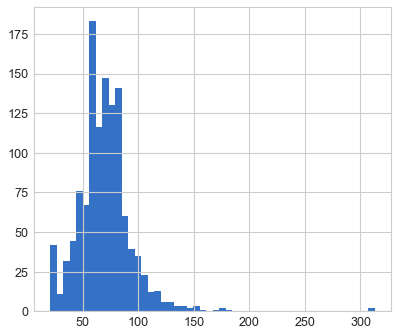

In [190]:
data['LotFrontage'].hist(bins=50)

In [191]:
data['LotFrontage'].median()

69.0

In [192]:
data['LotFrontage'].mean()

70.04995836802665

Заполним пустые значения для числовых и не числовых признаков:

In [193]:
data999 = data.copy()
datam = data.copy()

Далее мы будем рассматривать два датасета:
 - data999 с добавлением в пустые значения -999
 - datam с добавлением в пустые значения  медианного значения

In [194]:
#заполним числовые признаки с значением -999 в отдельный датает
for col in feat_num_null:
    data999.loc[data999[col].isnull(), col] = -999

In [195]:
#заполним числовые признаки с медианным значением в отдельный датает
for col in feat_num_null:
    datam.loc[datam[col].isnull(), col] = data[col].median()

In [196]:
#заполним нечисловые признаки с значением _nan
for col in feat_cat_null:
    data999.loc[data999[col].isnull(), col] = '_nan'
for col in feat_cat_null:
    datam.loc[datam[col].isnull(), col] = '_nan'

Определим категориальные (нечисловые) и числовые (непрерывные) признаки:
Из описания мы видим, что есть группа признаки с числовым типом, но это лишь коды текстовых значений. К ним относятся: 'MSSubClass', 'OverallQual', 'OverallCond' (количество уникальных значений 15, 10, 10 - соответсвтенно).

In [197]:
#так как это список имен признаков, то удалим. Также удалим целевую переменную SalePrice
excl = ['MSSubClass', 'OverallQual', 'OverallCond']
feat_cat = [col for col in data if data[col].dtype == 'O' or col in excl]
feat_num = [col for col in data if data[col].dtype != 'O' and col not in excl]
#удалим признак 'Id', так как он не несет в себе никакой информации (дублирует индексы)
feat_num.remove('Id')
#удалим признак 'Id', так как он является целевой переменной
feat_num.remove('SalePrice')

In [198]:
data999.drop("Id", axis=1, inplace=True)
datam.drop("Id", axis=1, inplace=True)

Выполним OneHotEncoding для категориальных признаков:

In [199]:
data999 = pd.get_dummies(data999, columns=feat_cat)
datam = pd.get_dummies(datam, columns=feat_cat)
#test = pd.get_dummies(test, columns=['LotShape', 'LandContour', 'Utilities'])

In [200]:
#выделим признаки и целевую переменную в соответствующие переменные X и y:
X9 = data999.copy()
X9.drop('SalePrice', axis=1, inplace=True)
y9 = data999['SalePrice'].copy()
Xm = datam.copy()
Xm.drop('SalePrice', axis=1, inplace=True)
ym = datam['SalePrice'].copy()

In [201]:
#test = data[['GarageQual','LotShape', 'LandContour', 'Utilities']].copy()
#test = pd.get_dummies(test, columns=['LotShape', 'LandContour', 'Utilities'])

Поделим исходные датасеты (999 и m) на тренировочную и тестовые выборки:

In [202]:
from sklearn.model_selection import train_test_split

X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3, random_state=0)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.3, random_state=0)


Оценим значимость признаков (в большей степени для этого и использовали одиноное дерево):
    - BsmtQual (низкий)
    - ExterQual (низкий)
    - OverallQual (очень низкий)
    - GarageCars (очень значимый)
    - GrLivArea (значимый)
    - 1stFlrSF (очень низкий)
    - TotalBsmtSF (очень низкий)
    - YearBlt (низкий)
    - LotArea (Оочень низчкий)
Значимость остальных признаком блика к нулю.

Применим метод слаучайного леса для построения регрессии:

In [203]:
from sklearn.ensemble import RandomForestRegressor

rfr9 = RandomForestRegressor(max_depth=4, min_samples_leaf=9)
rfr9.fit(X9_train, y9_train)
rfr_m = RandomForestRegressor(max_depth=4, min_samples_leaf=9)
rfr_m.fit(Xm_train, ym_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=9)

Оценим результаты:
    - При использовании параметров по умолчанию видим, что оценка R2 для тестовой и тренировочной выборки сильно отличаются 0.85(тест) против 0.97 (тренировочная)
    - Поробуем подобрать параметры. при снижении при снижении максимальной глубины точность модели падает, но при этом разность оценки R2 для моделей между тестововй и тренировочной выборками сокращается. значение маскмаьлной глубины 4 оказалось отимальным
    - далее попробовали уменьшить минимально количество данных в листьях дерева до 9. получили небольшой прирост в качестве и еще немного сократили разность между R2 для тестовой и тренировочный выборок

Итого: оценка качества R2 для тестовой выборки 0.81, для тренировочной - 0.83. Для версии с медианой результаты чуть лучше.

In [204]:
print('Score of Randoм Forest Regression for set 999: ')
print(
    'Test data: ', rfr9.score(X9_test, y9_test), ', Train data: ', rfr9.score(X9_train, y9_train)) 

Score of Randoм Forest Regression for set 999: 
Test data:  0.81404026958631 , Train data:  0.8390005283223149


In [205]:
print('Score for set median: ')
print(
    'Test data: ', rfr_m.score(Xm_test, ym_test), ', Train data: ', rfr_m.score(Xm_train, ym_train))

Score for set median: 
Test data:  0.8084412137624791 , Train data:  0.8353099551788878


Оценим занчимость признаков: значимость признаков, выявленных при дереве решений те же, но также проявилась значимость других признаков. И это понятно, так как выбираются не все признаки разом, а группами, что позволяет выявить их влияние на фоне меньего количества (в грппе каждого дерева) менее значимых признаков.

In [206]:
#только для модели с суффиксом m (числовые пустуе значения заполняются медианой)
feat_imp = np.hstack((rfr_m.feature_importances_.reshape(-1, 1), Xm.columns.ravel().reshape(-1,1)))

In [207]:
FI = feat_imp[feat_imp[:,0]>0.005]

In [208]:
FI

array([[0.006367670251821322, 'LotArea'],
       [0.05856934709066802, 'YearBuilt'],
       [0.010473909507388163, 'YearRemodAdd'],
       [0.02312270810932107, 'BsmtFinSF1'],
       [0.04148649820486163, 'TotalBsmtSF'],
       [0.04332632269419544, '1stFlrSF'],
       [0.30920545860831117, 'GrLivArea'],
       [0.32662785846588893, 'GarageCars'],
       [0.01910837627728613, 'GarageArea'],
       [0.016681523324553364, 'OverallQual_8'],
       [0.0428384708705444, 'ExterQual_TA'],
       [0.03925228276836176, 'BsmtQual_Ex'],
       [0.006964072767106416, 'KitchenQual_TA']], dtype=object)

([<matplotlib.axis.YTick at 0x27e0bc0e508>,
 <a list of 13 Text yticklabel objects>)

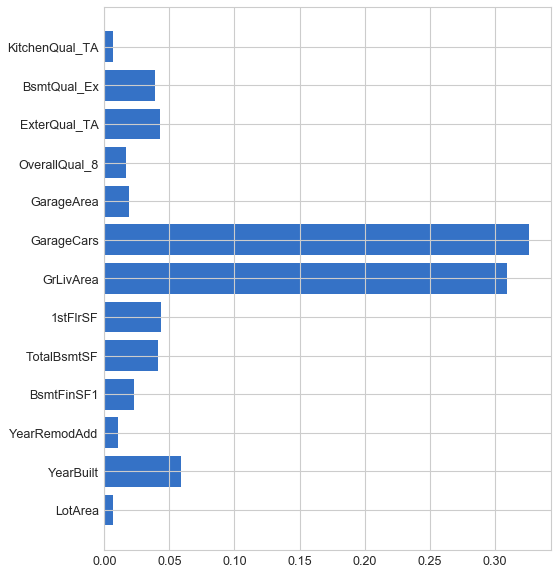

In [209]:
plt.figure(figsize=(8, 10))
plt.barh(np.arange(len(FI)), FI[:,0])
plt.yticks(np.arange(len(FI)),FI[:,1])

Попробуем применить стеккинг

In [210]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import GridSearchCV

In [211]:
#надо сделать стандартизацию для метода SVM (регрессора) и линейной регрессии
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xm_train[feat_num])

Xm_train[feat_num] = scaler.transform(Xm_train[feat_num])
Xm_test[feat_num] = scaler.transform(Xm_test[feat_num])

C:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [212]:
Stacking_Regressor = StackingRegressor(
    [
        ('linr', LinearRegression()),
        ('svr', SVR()),
        ('rf', RandomForestRegressor(max_depth=4, min_samples_leaf=9, random_state=42))
    ],
RandomForestRegressor())

In [213]:
Stacking_Regressor.fit(Xm_train, ym_train)

StackingRegressor(estimators=[('linr', LinearRegression()), ('svr', SVR()),
                              ('rf',
                               RandomForestRegressor(max_depth=4,
                                                     min_samples_leaf=9,
                                                     random_state=42))],
                  final_estimator=RandomForestRegressor())

In [214]:
print(
    ' r2 score for stacking regression model: ', Stacking_Regressor.score(Xm_test, ym_test),
    '\n r2 score for linear regression model: ', Stacking_Regressor.named_estimators_['linr'].score(Xm_test, ym_test),
    '\n r2 score for Random Forest regression model: ', Stacking_Regressor.named_estimators_['rf'].score(Xm_test, ym_test),
    '\n r2 score for Support Vector regression model: ', Stacking_Regressor.named_estimators_['svr'].score(Xm_test, ym_test)
)

 r2 score for stacking regression model:  0.85063929004413 
 r2 score for linear regression model:  -2.119690466253054e+19 
 r2 score for Random Forest regression model:  0.8121900569463617 
 r2 score for Support Vector regression model:  -0.05058144967412703


Как видим применение стэккинга улучшило результат R2 модели с 0.81 до 0.84. Также видны сильно более худшие результаты по R2 у моделей по отдельности.

Попробуем применить к нашей модели кросс валидацию на первом уровне c количеством фолдов 10 (для более точной оценки). Для этого воспользуемся библиотекой mlxtend функцией StackingCVRegressor. Результаты оказались примерно такими же как и прошлый раз 

In [254]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
linr = LinearRegression()
svr = SVR()
rf = RandomForestRegressor(max_depth=4, min_samples_leaf=9, random_state=42)
stack = StackingCVRegressor(regressors=(linr, svr, rf), cv = 10,
                            meta_regressor=RandomForestRegressor(),
                            random_state=42)

for rg, label in zip([linr, svr, rf, stack], ['Linear', 'SVR','Random Forest', 'StackingCVRegressor']):
    
    if label == 'StackingCVRegressor': 
        rg.fit(Xm_train, ym_train)
        pred = rg.predict(Xm_test)
        score = r2_score(ym_test, pred)
    else:
        X = Xm_train.to_numpy()
        kf = KFold(n_splits=10)
        score_t = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = Xm_train.iloc[train_index], Xm_train.iloc[test_index]
            y_train, y_test = ym_train.iloc[train_index], ym_train.iloc[test_index]
            rg.fit(X_train, y_train)
            pred = rg.predict(X_test)
            score_t.append(r2_score(y_test, pred))
        score = np.array(score_t).mean()
             
    print("R2 Score: %0.2f [%s]" % (score, label))

R2 Score: -18067295381176954880.00 [Linear]
R2 Score: -0.06 [SVR]
R2 Score: 0.79 [Random Forest]
R2 Score: 0.86 [StackingCVRegressor]
